<a href="https://colab.research.google.com/github/AlourdesJ/DSE6311OM_SP2025R2_Data-Science-Capstone/blob/main/FinalEDAxVisuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load test NSUMHSS CSV and  Faraji & Hennigan's (2024) Dataset
nsumhss_path = "NSUMHSS_2022_PUF_CSV.csv"
google_trends_path = "googleTrendsMH.xlsx"

# Load datasets
nsumhss_df = pd.read_csv(nsumhss_path)
google_trends_df = pd.read_excel(google_trends_path)

# Display the first few rows of both datasets
nsumhss_df.head(), google_trends_df.head()


(     MPRID INSU INMH LOCATIONSTATE FOCUS SUTRTMNTALSO JAIL OTHNONTX DETOX  \
 0  100002G    1    1            IN     3            L    0        1     0   
 1  100120A    M    1            MN     2            0    0        L     L   
 2  100126F    1    M            FL     M            M    M        M     M   
 3  100151K    1    M            NH     M            M    M        M     M   
 4  100161B    1    M            DE     M            M    M        M     M   
 
   TREATMT_SU  ... VAMAINTAIN VAFUAPPTMSSD VASPC_MH VACAREMGR_MH VAPROGSUPP_MH  \
 0          1  ...          L            L        L            L             L   
 1          L  ...          L            L        L            L             L   
 2          M  ...          M            M        M            M             M   
 3          M  ...          M            M        M            M             M   
 4          M  ...          M            M        M            M             M   
 
   VAHIGHRISKHI_MH VAHIGHRISKRC_MH V

In [ ]:
import pandas as pd

# File-year mapping including 2023
file_year_map = {
    "N-SSATS-2013-DS0001-data-excel.csv": 2013,
    "N-MHSS-2014-DS0001-data-excel.csv": 2014,
    "N-MHSS-2015-DS0001-data-excel.csv": 2015,
    "nmhss_puf_2016.csv": 2016,
    "NMHSS_2017_PUF_CSV.csv": 2017,
    "nmhss-puf-2018-csv.csv": 2018,
    "nmhss-puf-2019-csv.csv": 2019,
    "nmhss-puf-2020-csv.csv": 2020,
    "NSUMHSS_2021_PUF_CSV.csv": 2021,
    "NSUMHSS_2022_PUF_CSV.csv": 2022,
    "NSUMHSS_2023_PUF_CSV.csv": 2023,
}

# Define the function again after reset
def process_nsumhss_file(path: str, year: int) -> pd.DataFrame:
    df = pd.read_csv(path)
    df['YEAR'] = year

    def convert_flag(val):
        if str(val).strip() in ['1', 'Y']:
            return 1
        elif str(val).strip() in ['0', 'N']:
            return 0
        else:
            return pd.NA

    try:
        subset = df[[
            'LOCATIONSTATE', 'FOCUS', 'CTYPEHI2',
            'SRVC95', 'SRVC30', 'SRVC120',
            'REVCHK3', 'REVCHK8_SU', 'SRVC6', 'SRVC5'
        ]].copy()
    except KeyError:
        return pd.DataFrame()

    for col in ['SRVC95', 'SRVC30', 'SRVC120', 'REVCHK3', 'REVCHK8_SU', 'SRVC6', 'SRVC5']:
        subset[col] = subset[col].apply(convert_flag)

    subset['MENTAL_HEALTH_ONLY'] = df['FOCUS'].apply(lambda x: 1 if str(x).strip() == '2' else 0)
    subset['INPATIENT'] = df['CTYPEHI2'].apply(lambda x: 1 if str(x).strip() == '1' else 0)
    subset['YEAR'] = year
    subset['YOUTH_SERVICES'] = (subset[['SRVC30', 'SRVC120']].sum(axis=1, skipna=True) >= 1).astype(int)
    subset['COUNSELING_SERVICES'] = (subset[['SRVC6', 'SRVC5']].sum(axis=1, skipna=True) >= 1).astype(int)

    grouped = subset.groupby(['LOCATIONSTATE', 'YEAR']).agg(
        total_facilities=('LOCATIONSTATE', 'count'),
        mental_health_only=('MENTAL_HEALTH_ONLY', 'sum'),
        inpatient_facilities=('INPATIENT', 'sum'),
        pct_pharmacotherapy=('SRVC95', 'mean'),
        pct_free_services=('REVCHK3', 'mean'),
        pct_medicare_services=('REVCHK8_SU', 'mean'),
        pct_youth_services=('YOUTH_SERVICES', 'mean'),
        pct_counseling_services=('COUNSELING_SERVICES', 'mean')
    ).reset_index()

    return grouped

# Loop through files and process
all_years_data = []
for filename, year in file_year_map.items():
    file_path = f"{filename}"
    df = process_nsumhss_file(file_path, year)
    if not df.empty:
        all_years_data.append(df)

# Concatenate all results
nsumhss_2013_2023_df = pd.concat(all_years_data, ignore_index=True)


<ipython-input-2-024a94fca3d9>:20: DtypeWarning: Columns (2,21,23,26,50,68,69,72,74,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [ ]:
# Reload the Google Trends dataset
google_trends_df = pd.read_excel("googleTrendsMH.xlsx", sheet_name="googleTrendsMH")

# Redefine the file-year mapping (2013–2023)
file_year_map = {
    "N-SSATS-2013-DS0001-data-excel.csv": 2013,
    "N-MHSS-2014-DS0001-data-excel.csv": 2014,
    "N-MHSS-2015-DS0001-data-excel.csv": 2015,
    "nmhss_puf_2016.csv": 2016,
    "NMHSS_2017_PUF_CSV.csv": 2017,
    "nmhss-puf-2018-csv.csv": 2018,
    "nmhss-puf-2019-csv.csv": 2019,
    "nmhss-puf-2020-csv.csv": 2020,
    "NSUMHSS_2021_PUF_CSV.csv": 2021,
    "NSUMHSS_2022_PUF_CSV.csv": 2022,
    "NSUMHSS_2023_PUF_CSV.csv": 2023,
}

# Define NSUMHSS processor
def process_nsumhss_file(path: str, year: int) -> pd.DataFrame:
    df = pd.read_csv(path)
    df['YEAR'] = year

    def convert_flag(val):
        if str(val).strip() in ['1', 'Y']:
            return 1
        elif str(val).strip() in ['0', 'N']:
            return 0
        else:
            return pd.NA

    try:
        subset = df[[
            'LOCATIONSTATE', 'FOCUS', 'CTYPEHI2',
            'SRVC95', 'SRVC30', 'SRVC120',
            'REVCHK3', 'REVCHK8_SU', 'SRVC6', 'SRVC5'
        ]].copy()
    except KeyError:
        return pd.DataFrame()

    for col in ['SRVC95', 'SRVC30', 'SRVC120', 'REVCHK3', 'REVCHK8_SU', 'SRVC6', 'SRVC5']:
        subset[col] = subset[col].apply(convert_flag)

    subset['MENTAL_HEALTH_ONLY'] = df['FOCUS'].apply(lambda x: 1 if str(x).strip() == '2' else 0)
    subset['INPATIENT'] = df['CTYPEHI2'].apply(lambda x: 1 if str(x).strip() == '1' else 0)
    subset['YEAR'] = year
    subset['YOUTH_SERVICES'] = (subset[['SRVC30', 'SRVC120']].sum(axis=1, skipna=True) >= 1).astype(int)
    subset['COUNSELING_SERVICES'] = (subset[['SRVC6', 'SRVC5']].sum(axis=1, skipna=True) >= 1).astype(int)

    grouped = subset.groupby(['LOCATIONSTATE', 'YEAR']).agg(
        total_facilities=('LOCATIONSTATE', 'count'),
        mental_health_only=('MENTAL_HEALTH_ONLY', 'sum'),
        inpatient_facilities=('INPATIENT', 'sum'),
        pct_pharmacotherapy=('SRVC95', 'mean'),
        pct_free_services=('REVCHK3', 'mean'),
        pct_medicare_services=('REVCHK8_SU', 'mean'),
        pct_youth_services=('YOUTH_SERVICES', 'mean'),
        pct_counseling_services=('COUNSELING_SERVICES', 'mean')
    ).reset_index()

    return grouped

# Process all files
all_years_data = []
for filename, year in file_year_map.items():
    df = process_nsumhss_file(f"{filename}", year)
    if not df.empty:
        all_years_data.append(df)

nsumhss_agg = pd.concat(all_years_data, ignore_index=True)

# Prepare for merge
google_trends_df['state'] = google_trends_df['state'].str.upper()
google_trends_df['year'] = google_trends_df['year'].astype(int)

# Merge datasets
merged_df = pd.merge(
    google_trends_df,
    nsumhss_agg,
    how='left',
    left_on=['state', 'year'],
    right_on=['LOCATIONSTATE', 'YEAR']
)

# Calculate per capita metrics
merged_df['per_capita_total_facilities'] = merged_df['total_facilities'] / merged_df['population_est']
merged_df['per_capita_mental_health_only'] = merged_df['mental_health_only'] / merged_df['population_est']
merged_df['per_capita_inpatient_facilities'] = merged_df['inpatient_facilities'] / merged_df['population_est']

# Drop redundant merge keys
merged_df.drop(columns=['LOCATIONSTATE', 'YEAR'], inplace=True)


<ipython-input-3-da6c1dc59368>:21: DtypeWarning: Columns (2,21,23,26,50,68,69,72,74,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [ ]:
# Save the merged dataset locally
merged_df.to_csv("Merged_Trends_NSUMHSS_2013_2023.csv", index=False)
print("Dataset exported as 'Merged_Trends_NSUMHSS_2013_2023.csv'")


Dataset exported as 'Merged_Trends_NSUMHSS_2013_2023.csv'


<ipython-input-5-df23962ea2a1>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda_summary, x="year", y="mean_all_trends", estimator='mean', ci=None, marker='o')
<ipython-input-5-df23962ea2a1>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda_summary, x="year", y="per_capita_total_facilities", estimator='mean', ci=None, marker='o')
<ipython-input-5-df23962ea2a1>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda_summary, x="year", y="pct_youth_services", estimator='mean', ci=None, marker='o')
<ipython-input-5-df23962ea2a1>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=eda_summary, x="year", y="pct_free_services", estimator='mean', ci=None, marker='o')


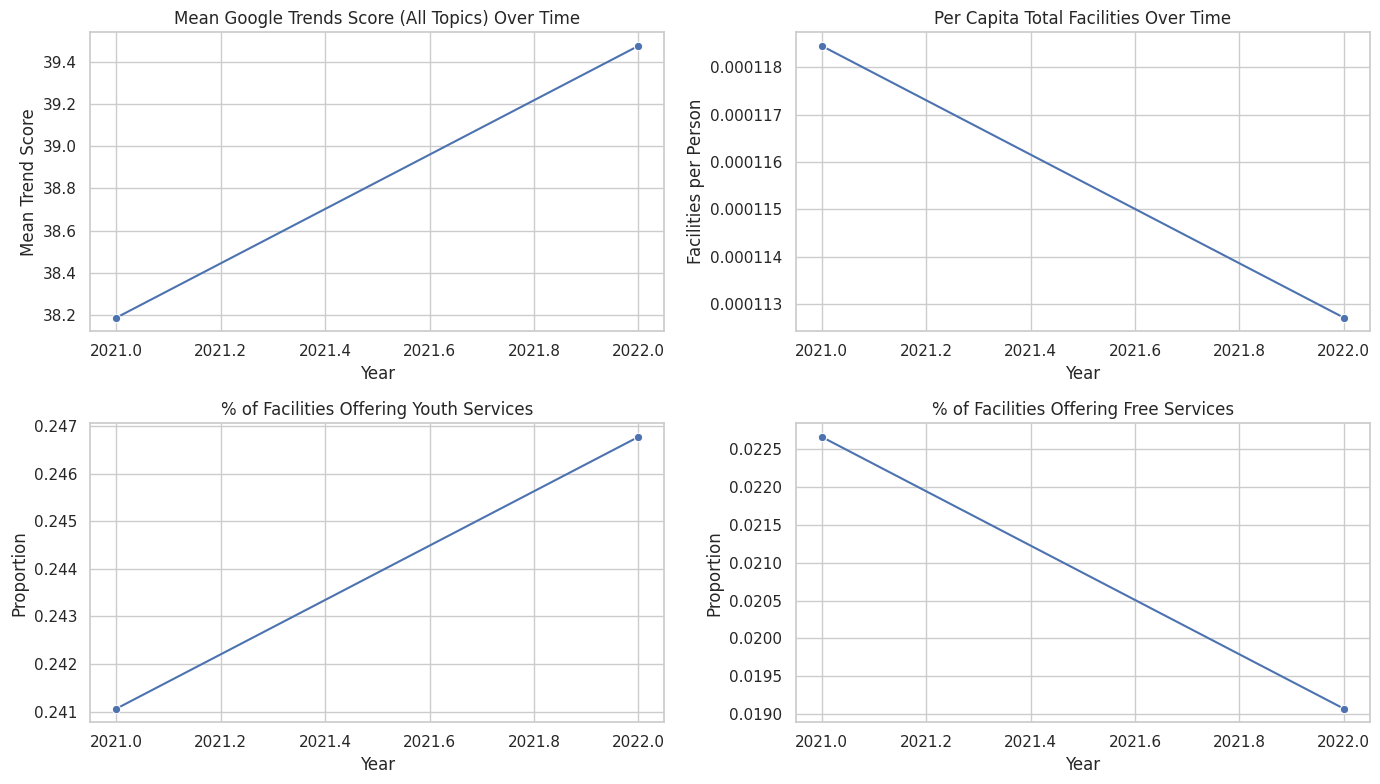

In [ ]:
# Import libraries relevant for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
merged_df = pd.read_csv("Merged_Trends_NSUMHSS_2013_2023.csv")

# Clean and prepare data for visualization
eda_summary = merged_df[[
    "year", "state", "population_est",
    "per_capita_total_facilities", "per_capita_mental_health_only", "per_capita_inpatient_facilities",
    "pct_pharmacotherapy", "pct_youth_services", "pct_free_services",
    "pct_medicare_services", "pct_counseling_services", "mean_all_trends"
]].dropna()

# Set up the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot 1: Trend of Google search interest across years
plt.subplot(2, 2, 1)
sns.lineplot(data=eda_summary, x="year", y="mean_all_trends", estimator='mean', ci=None, marker='o')
plt.title("Mean Google Trends Score (All Topics) Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Trend Score")

# Plot 2: Per capita total facility access over time
plt.subplot(2, 2, 2)
sns.lineplot(data=eda_summary, x="year", y="per_capita_total_facilities", estimator='mean', ci=None, marker='o')
plt.title("Per Capita Total Facilities Over Time")
plt.xlabel("Year")
plt.ylabel("Facilities per Person")

# Plot 3: Percentage of facilities offering youth services
plt.subplot(2, 2, 3)
sns.lineplot(data=eda_summary, x="year", y="pct_youth_services", estimator='mean', ci=None, marker='o')
plt.title("% of Facilities Offering Youth Services")
plt.xlabel("Year")
plt.ylabel("Proportion")

# Plot 4: Percentage of facilities offering free services
plt.subplot(2, 2, 4)
sns.lineplot(data=eda_summary, x="year", y="pct_free_services", estimator='mean', ci=None, marker='o')
plt.title("% of Facilities Offering Free Services")
plt.xlabel("Year")
plt.ylabel("Proportion")

plt.tight_layout()
plt.show()


<ipython-input-6-d4cda7d160a0>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=state_trends_df, x="year", y="mean_all_trends", hue="region", estimator="mean", ci=None, marker="o")
<ipython-input-6-d4cda7d160a0>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=state_trends_df, x="year", y="per_capita_total_facilities", hue="region", estimator="mean", ci=None, marker="o")


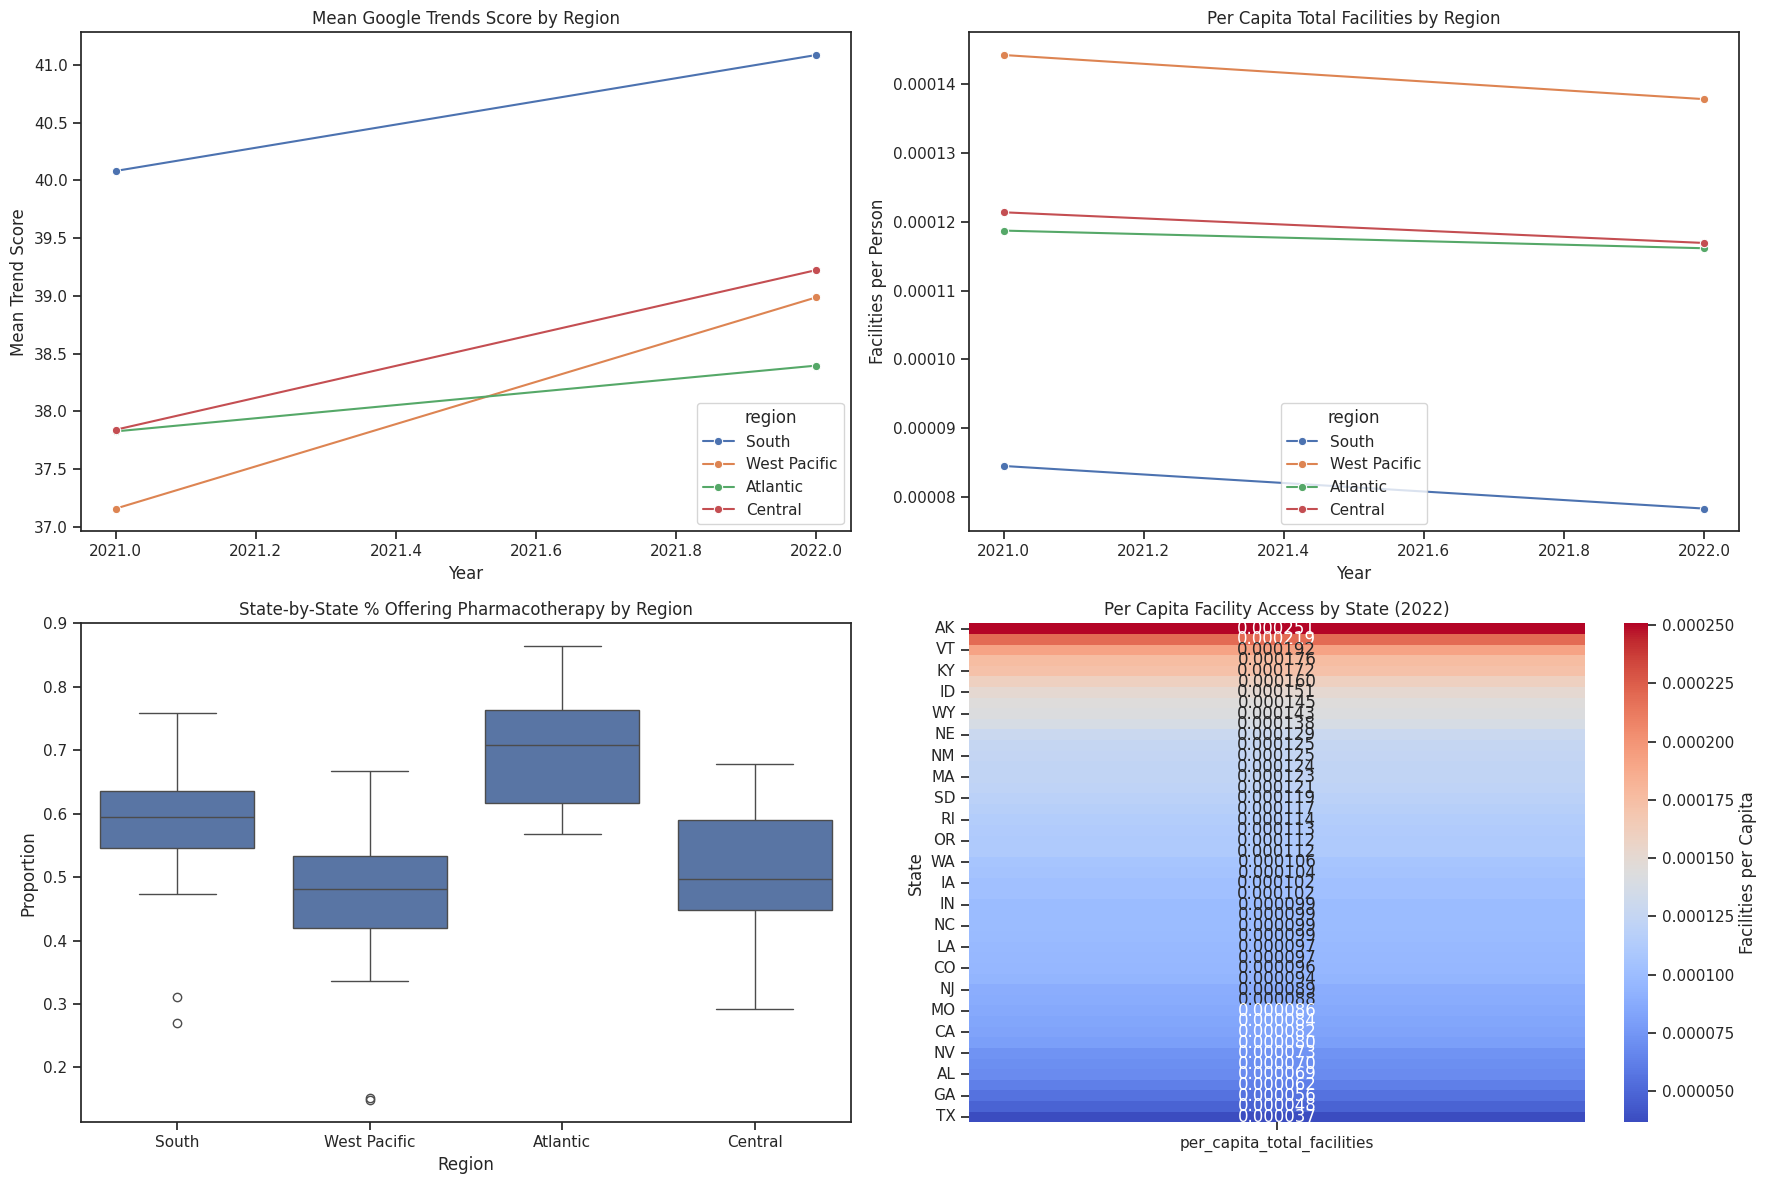

In [ ]:
# Filter for relevant years and drop missing
state_trends_df = merged_df[[
    "year", "state", "region", "mean_all_trends",
    "per_capita_total_facilities", "pct_pharmacotherapy", "pct_free_services"
]].dropna()

# Set up plotting space
plt.figure(figsize=(18, 12))
sns.set(style="ticks")

# Plot 1: Google Trends over time by region
plt.subplot(2, 2, 1)
sns.lineplot(data=state_trends_df, x="year", y="mean_all_trends", hue="region", estimator="mean", ci=None, marker="o")
plt.title("Mean Google Trends Score by Region")
plt.ylabel("Mean Trend Score")
plt.xlabel("Year")

# Plot 2: Per capita facilities over time by region
plt.subplot(2, 2, 2)
sns.lineplot(data=state_trends_df, x="year", y="per_capita_total_facilities", hue="region", estimator="mean", ci=None, marker="o")
plt.title("Per Capita Total Facilities by Region")
plt.ylabel("Facilities per Person")
plt.xlabel("Year")

# Plot 3: Boxplot of pharmacotherapy access by state
plt.subplot(2, 2, 3)
sns.boxplot(data=state_trends_df, x="region", y="pct_pharmacotherapy")
plt.title("State-by-State % Offering Pharmacotherapy by Region")
plt.ylabel("Proportion")
plt.xlabel("Region")

# Plot 4: Heatmap of average facility access by state (latest year)
latest_year = state_trends_df["year"].max()
heatmap_df = state_trends_df[state_trends_df["year"] == latest_year].pivot_table(
    index="state", values="per_capita_total_facilities", aggfunc="mean"
).sort_values("per_capita_total_facilities", ascending=False)

plt.subplot(2, 2, 4)
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", fmt=".6f", cbar_kws={'label': 'Facilities per Capita'})
plt.title(f"Per Capita Facility Access by State ({latest_year})")
plt.ylabel("State")
plt.xlabel("")

plt.tight_layout()
plt.show()


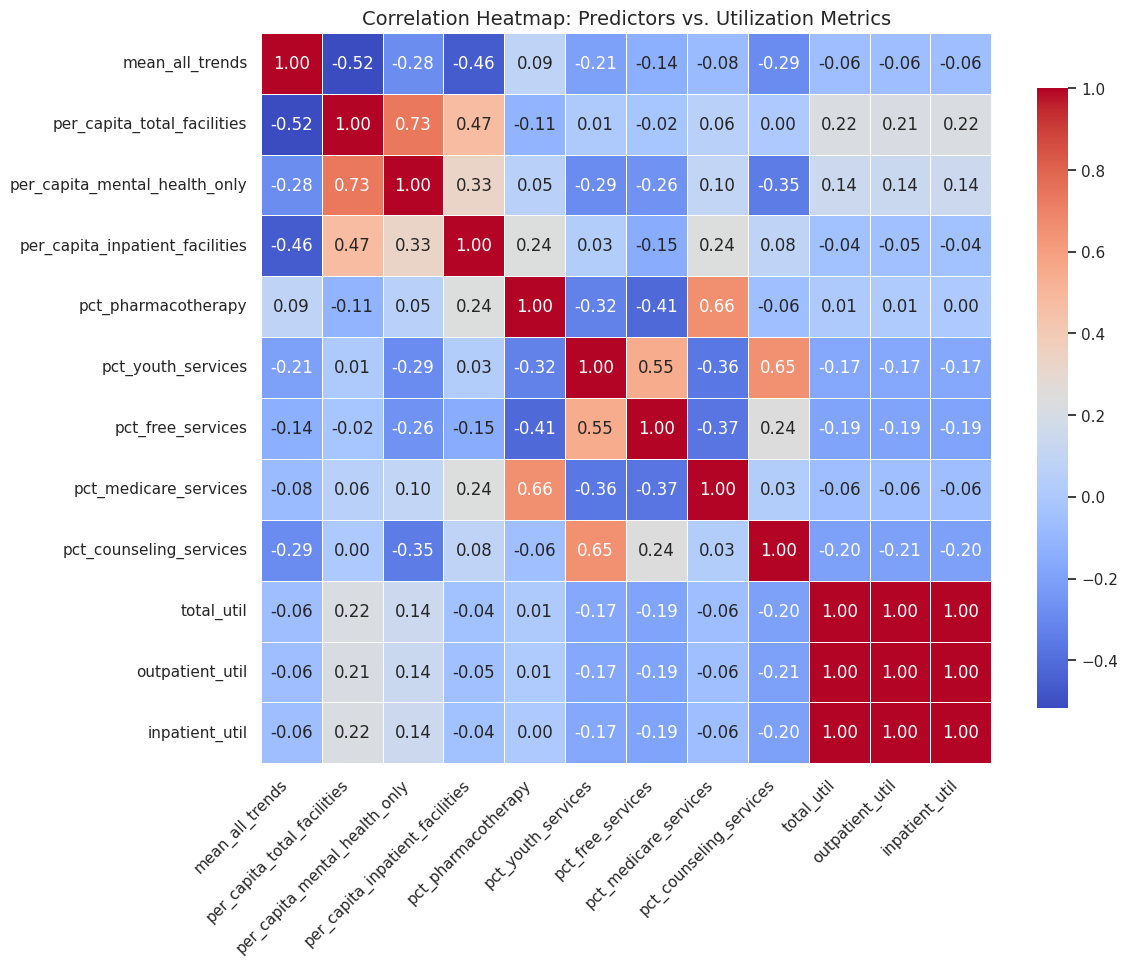

In [ ]:
# Prepare cleaned dataset for correlation analysis
correlation_df = merged_df[[
    "mean_all_trends",
    "per_capita_total_facilities", "per_capita_mental_health_only", "per_capita_inpatient_facilities",
    "pct_pharmacotherapy", "pct_youth_services", "pct_free_services",
    "pct_medicare_services", "pct_counseling_services",
    "total_util", "outpatient_util", "inpatient_util"
]].dropna()

# Set up and render the correlation heatmap
plt.figure(figsize=(12, 10))
sns.set(style="white")

corr_matrix = correlation_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap: Predictors vs. Utilization Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Group by year and calculate national averages
yearly_df = merged_df.groupby("year").agg({
    "mean_all_trends": "mean",
    "per_capita_total_facilities": "mean",
    "per_capita_mental_health_only": "mean",
    "per_capita_inpatient_facilities": "mean",
    "pct_pharmacotherapy": "mean",
    "pct_youth_services": "mean",
    "pct_free_services": "mean",
    "pct_medicare_services": "mean",
    "pct_counseling_services": "mean",
    "total_util": "mean",
    "inpatient_util": "mean",
    "outpatient_util": "mean"
}).reset_index()

# Compute YoY % change
yoy_change = yearly_df.copy()
yoy_change.iloc[:, 1:] = yearly_df.iloc[:, 1:].pct_change() * 100
yoy_change = yoy_change.round(2)

# Rename columns for readability
yoy_change.rename(columns={
    "mean_all_trends": "% Δ Google Trends",
    "per_capita_total_facilities": "% Δ Total Facility Access",
    "per_capita_mental_health_only": "% Δ MH-Only Facility Access",
    "per_capita_inpatient_facilities": "% Δ Inpatient Facility Access",
    "pct_pharmacotherapy": "% Δ Pharmacotherapy",
    "pct_youth_services": "% Δ Youth Services",
    "pct_free_services": "% Δ Free Services",
    "pct_medicare_services": "% Δ Medicare",
    "pct_counseling_services": "% Δ Counseling",
    "total_util": "% Δ Total Utilization",
    "inpatient_util": "% Δ Inpatient Utilization",
    "outpatient_util": "% Δ Outpatient Utilization"
}, inplace=True)



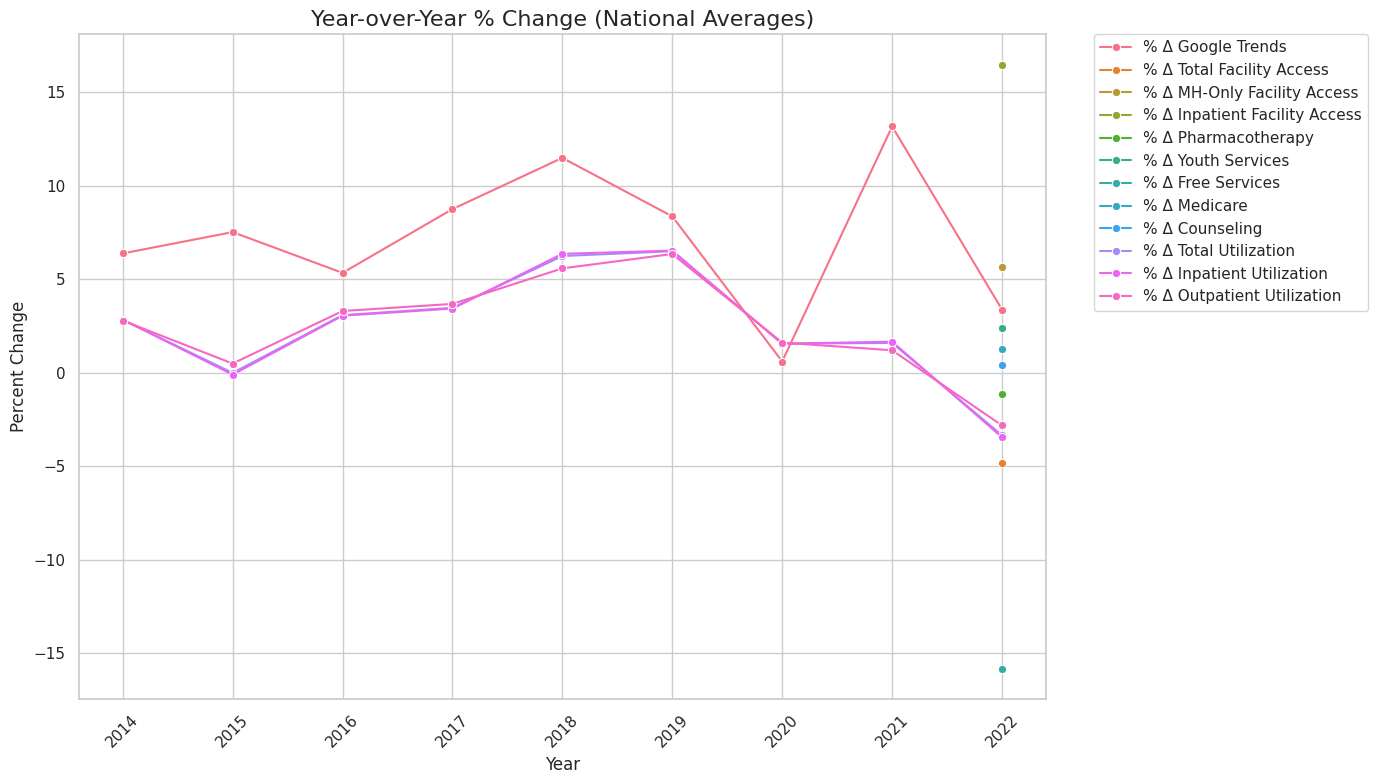

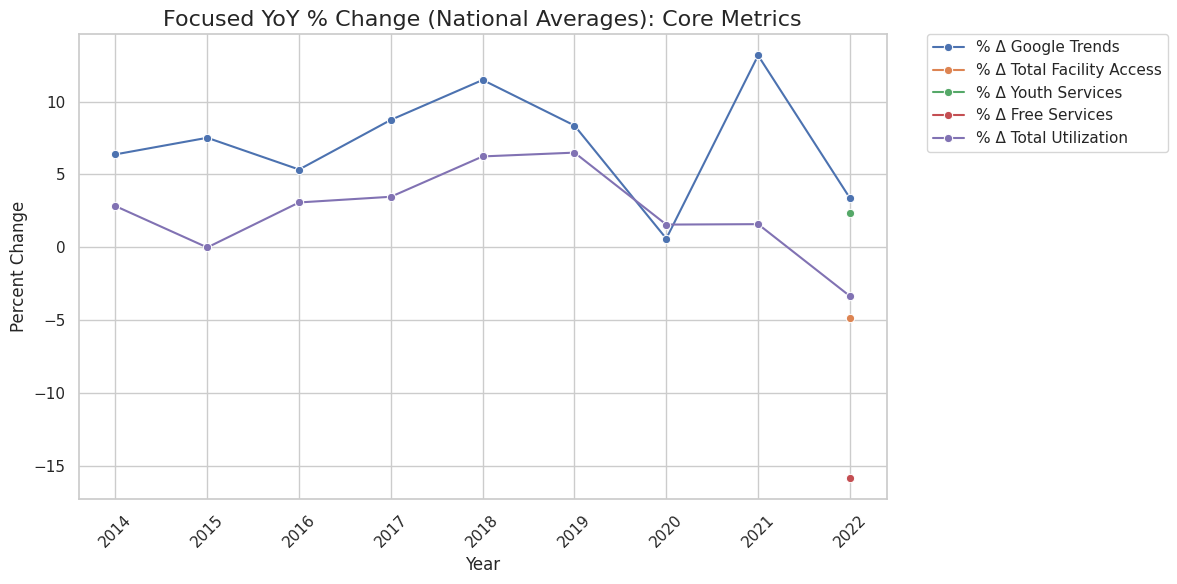

In [ ]:
# Year-over-Year% Change Analysis

# Filter out the first year (2013) since it has all NaNs for % change
yoy_plot_data = yoy_change[yoy_change["year"] > 2013].copy()

# Melt the dataframe to long format for seaborn
yoy_long = yoy_plot_data.melt(id_vars="year", var_name="Metric", value_name="YoY % Change")

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Lineplot for each metric
sns.lineplot(data=yoy_long, x="year", y="YoY % Change", hue="Metric", marker="o")

plt.title("Year-over-Year % Change (National Averages)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Select core metrics to highlight in visualization
core_metrics = [
    "% Δ Google Trends",
    "% Δ Total Facility Access",
    "% Δ Youth Services",
    "% Δ Free Services",
    "% Δ Total Utilization"
]

# Filter the long-form dataframe to include only selected metrics
core_yoy_long = yoy_long[yoy_long["Metric"].isin(core_metrics)]

# Plot refined year-over-year visualization
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.lineplot(data=core_yoy_long, x="year", y="YoY % Change", hue="Metric", marker="o")

plt.title("Focused YoY % Change (National Averages): Core Metrics", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-10-c25c0619643f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_util_df, y="state", x="total_util", palette="viridis")


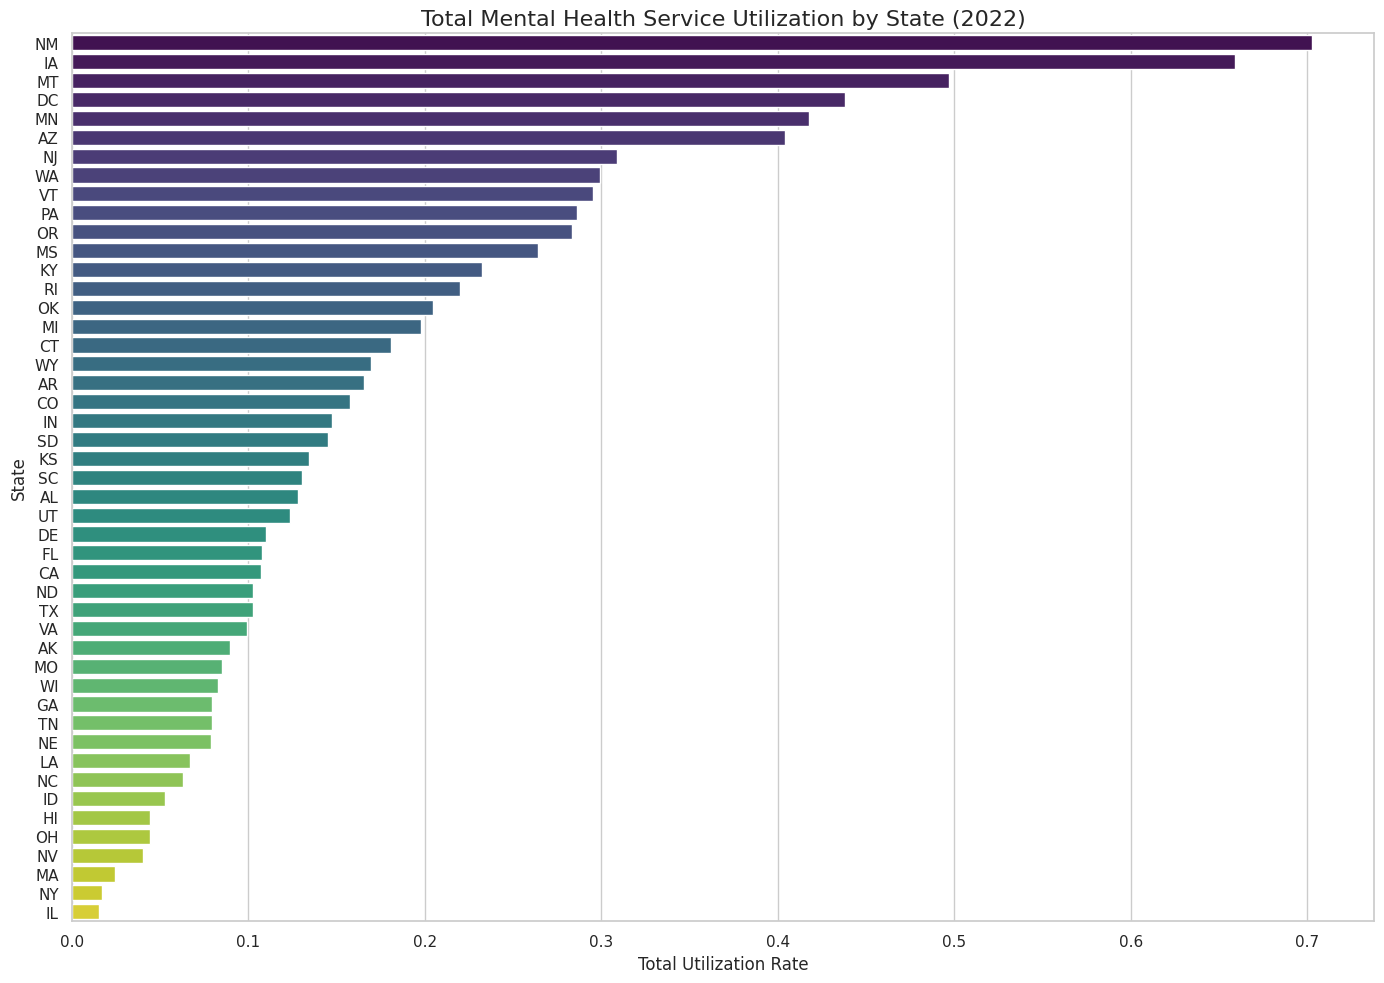

In [ ]:
# Visualize all the States together

# Set up plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Filter most recent year with available utilization data
latest_year = merged_df["year"].max()
state_util_df = merged_df[merged_df["year"] == latest_year].copy()

# Sort by total utilization
state_util_df = state_util_df.sort_values("total_util", ascending=False)

# Plot bar chart of total utilization by state
sns.barplot(data=state_util_df, y="state", x="total_util", palette="viridis")

plt.title(f"Total Mental Health Service Utilization by State ({latest_year})", fontsize=16)
plt.xlabel("Total Utilization Rate")
plt.ylabel("State")
plt.tight_layout()
plt.show()


<ipython-input-11-f34d2593bd5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=state_util_df, y="state", x="total_util", palette="viridis")


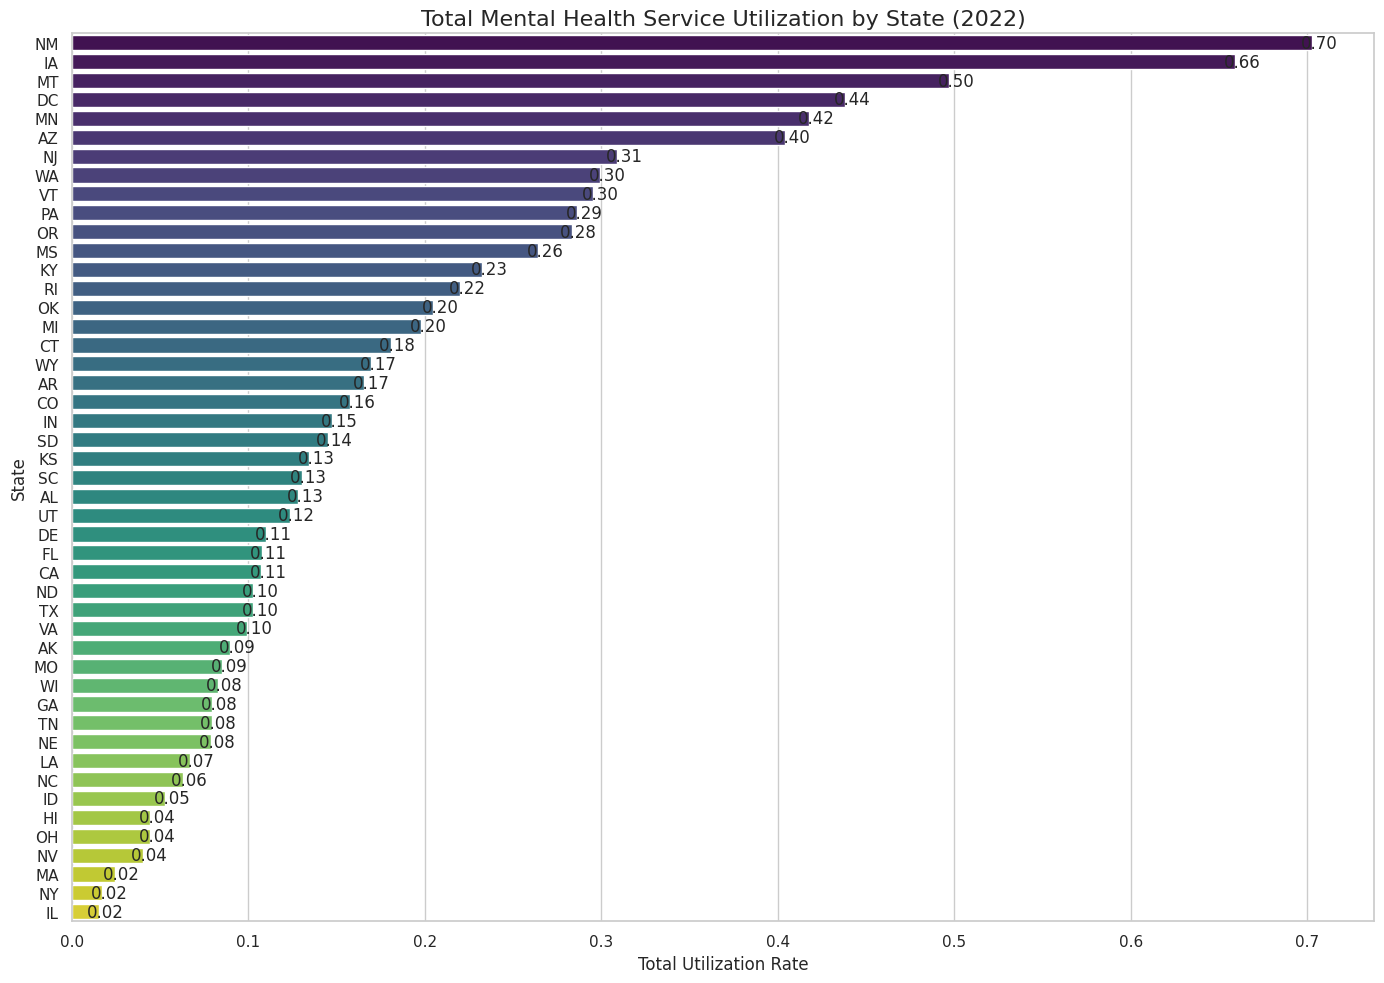

In [ ]:
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot bar chart
ax = sns.barplot(data=state_util_df, y="state", x="total_util", palette="viridis")

# Annotate bars with the total utilization value
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords="offset points", ha='center', va='center')

plt.title(f"Total Mental Health Service Utilization by State ({latest_year})", fontsize=16)
plt.xlabel("Total Utilization Rate")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [ ]:
# Load your dataset
df = pd.read_csv("Merged_Trends_NSUMHSS_2013_2023.csv")

# Function to summarize each variable
def create_codebook(df):
    codebook = pd.DataFrame({
        "Variable": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
        "Min": [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],
        "Max": [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],
        "Example Value": [df[col].dropna().iloc[0] if not df[col].dropna().empty else None for col in df.columns],
        "Description": ["[Enter description here]" for _ in df.columns]
    })
    return codebook

# Generate codebook
codebook_df = create_codebook(df)

# Export codebook to CSV or Excel for review and editing
codebook_df.to_csv("Codebook_Mental_Health_Project.csv", index=False)
# OR for Excel
# codebook_df.to_excel("Codebook_Mental_Health_Project.xlsx", index=False)

print("Codebook generated and saved as 'Codebook_Mental_Health_Project.csv'")


Codebook generated and saved as 'Codebook_Mental_Health_Project.csv'


In [ ]:
from scipy.stats import skew, kurtosis

# Reload the dataset
df = pd.read_csv("Merged_Trends_NSUMHSS_2013_2023.csv")

# CATEGORICAL SUMMARY
# Frequencies and proportions for 'state' and 'region'
categorical_summary = df.groupby("region")["state"].nunique().reset_index()
categorical_summary.columns = ["Region", "Unique States"]
categorical_summary["Total States"] = df["state"].nunique()
categorical_summary["Proportion (%)"] = round((categorical_summary["Unique States"] / categorical_summary["Total States"]) * 100, 2)

# CONTINUOUS SUMMARY
continuous_vars = [
    "mean_all_trends", "per_capita_total_facilities", "per_capita_mental_health_only",
    "per_capita_inpatient_facilities", "pct_pharmacotherapy", "pct_youth_services",
    "pct_free_services", "pct_medicare_services", "pct_counseling_services",
    "total_util", "outpatient_util", "inpatient_util"
]

continuous_summary = []

for var in continuous_vars:
    if var in df.columns:
        continuous_summary.append({
            "Variable": var,
            "Mean": round(df[var].mean(), 3),
            "Median": round(df[var].median(), 3),
            "Std Dev": round(df[var].std(), 3),
            "Min": round(df[var].min(), 3),
            "Max": round(df[var].max(), 3),
            "Skew": round(skew(df[var].dropna()), 3),
            "Kurtosis": round(kurtosis(df[var].dropna()), 3)
        })

# Create DataFrame from the list
continuous_summary = pd.DataFrame(continuous_summary)

categorical_summary

,Region,Unique States,Total States,Proportion (%)
0,Atlantic,9,47,19.15
1,Central,13,47,27.66
2,South,12,47,25.53
3,West Pacific,13,47,27.66


from matplotlib import pyplot as plt
categorical_summary['Unique States'].plot(kind='hist', bins=20, title='Unique States')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
categorical_summary['Proportion (%)'].plot(kind='hist', bins=20, title='Proportion (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
categorical_summary.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
categorical_summary.plot(kind='scatter', x='Unique States', y='Proportion (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total States']
  ys = series['Unique States']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = categorical_summary.sort_values('Total States', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total States')
_ = plt.ylabel('Unique States')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total States']
  ys = series['Proportion (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = categorical_summary.sort_values('Total States', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total States')
_ = plt.ylabel('Proportion (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total States']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total States'}, axis=1)
              .sort_values('Total States', ascending=True))
  xs = counted['Total States']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = categorical_summary.sort_values('Total States', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total States')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
categorical_summary['Unique States'].plot(kind='line', figsize=(8, 4), title='Unique States')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
categorical_summary['Proportion (%)'].plot(kind='line', figsize=(8, 4), title='Proportion (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(categorical_summary['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(categorical_summary, x='Unique States', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(categorical_summary['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(categorical_summary, x='Proportion (%)', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

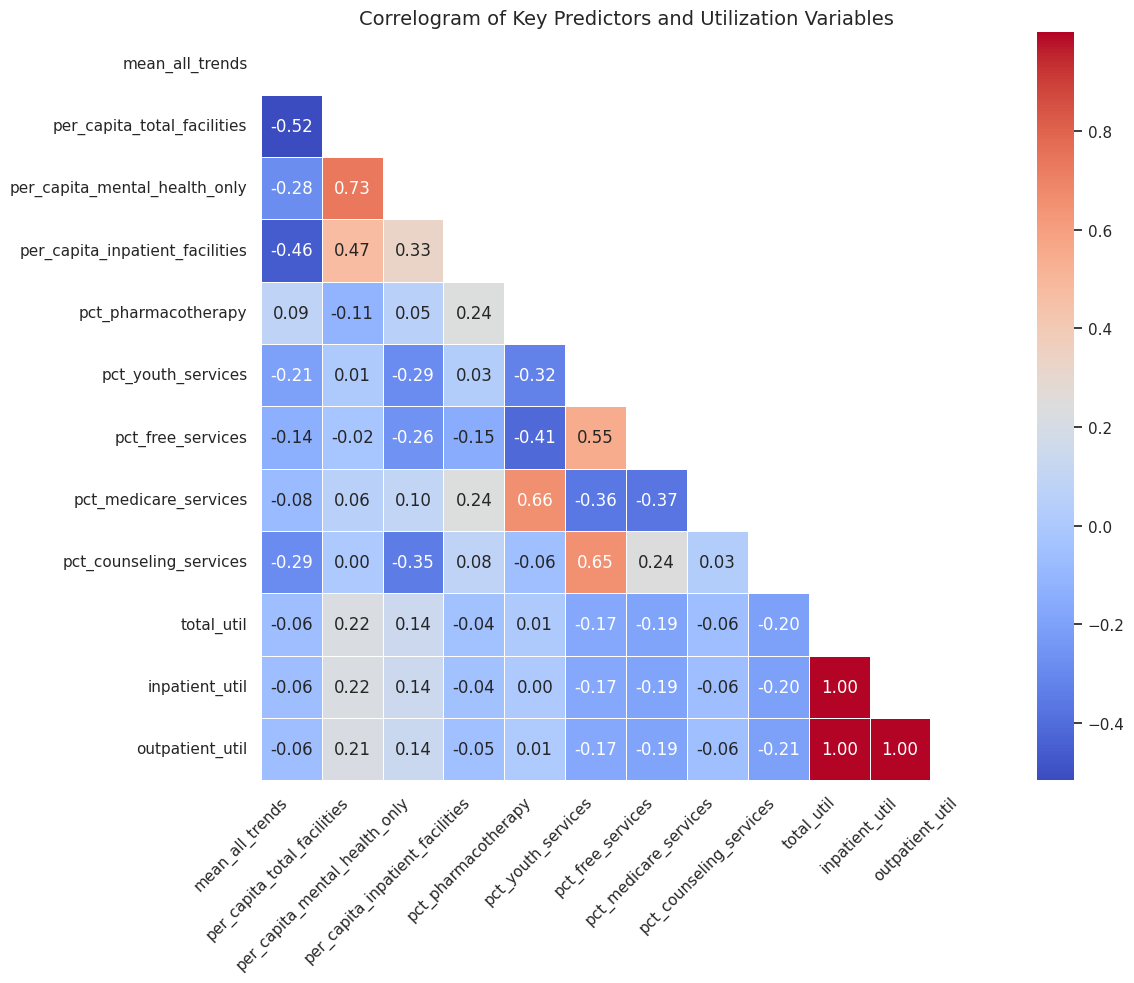

In [ ]:
# Load the merged dataset
import numpy as np # Import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Merged_Trends_NSUMHSS_2013_2023.csv")
df_clean = df.dropna()

# Define continuous variables for collinearity analysis
collinearity_vars = [
    "mean_all_trends", "per_capita_total_facilities", "per_capita_mental_health_only",
    "per_capita_inpatient_facilities", "pct_pharmacotherapy", "pct_youth_services",
    "pct_free_services", "pct_medicare_services", "pct_counseling_services",
    "total_util", "inpatient_util", "outpatient_util"
]

# Compute correlation matrix
corr_matrix = df_clean[collinearity_vars].corr()

# Plot correlogram (upper triangle mask)
plt.figure(figsize=(12, 10))
sns.set(style="white")

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlogram of Key Predictors and Utilization Variables", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()